## Stage A Tag Along Project
* Name: Izuogu Chibuzor Godson
* Hamonye ID: 147dfe393d01f000
* Email: godsonizuogu@gmail.com
* Track: Data Science,

In [1]:
# Importting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,5)

In [4]:
# loading the dataset
food_df = pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding="ISO-8859-1")

### Exploratory Data Analysis (EDA)

In [5]:
# Checking the number of rows and columns of the dataset
food_df.shape

(60943, 12)

In [6]:
# Checking the first five rows of the dataset
food_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [7]:
## Performing groupby
food_df.groupby("Item")["Y2014", "Y2017", "Item"].sum()

,Y2014,Y2017
Item,,
"Alcohol, Non-Food",2403.00,2348.00
Alcoholic Beverages,102410.11,95581.06
Animal Products,11935.65,11547.65
Animal fats,209460.54,269617.53
Apples and products,9499.23,10198.90
...,...,...
"Vegetables, Other",155038.96,157752.59
Vegetal Products,107145.19,107655.20
Wheat and products,232670.13,240047.62


In [8]:
## Summary statistics
food_df.describe(include="all")

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943,60943.000000,60943,60943.000000,60943,60943,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
unique,NaN,49,NaN,119,NaN,18,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Kenya,NaN,Milk - Excluding Butter,NaN,Domestic supply quantity,1000 tonnes,NaN,NaN,NaN,NaN,NaN
freq,NaN,1560,NaN,1262,NaN,5295,40933,NaN,NaN,NaN,NaN,NaN
mean,134.265576,NaN,2687.176706,NaN,3814.856456,NaN,NaN,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,NaN,146.055739,NaN,2212.007033,NaN,NaN,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,NaN,2501.000000,NaN,511.000000,NaN,NaN,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,NaN,2562.000000,NaN,684.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,NaN,2630.000000,NaN,5142.000000,NaN,NaN,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,NaN,2775.000000,NaN,5511.000000,NaN,NaN,8.340000,8.460000,8.430000,9.000000,9.000000


In [9]:
# Question 13 (a)
food_df.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [13]:
# Question 13(b)
(1535/len(food_df["Y2015"])) * 100

2.5187470259094566

<AxesSubplot:>

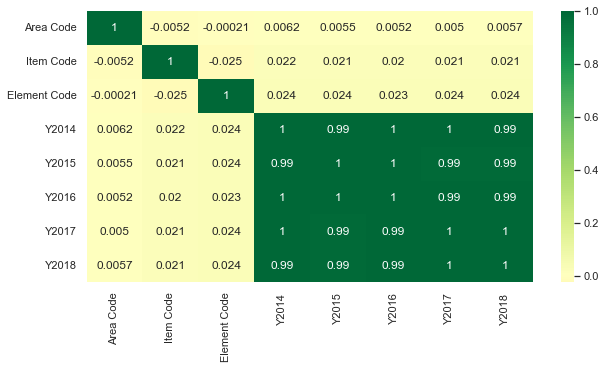

In [10]:
# Checking correlations and relationship
sns.heatmap(food_df.corr(), cmap='RdYlGn', annot = True, center = 0)

<Figure size 1440x864 with 0 Axes>

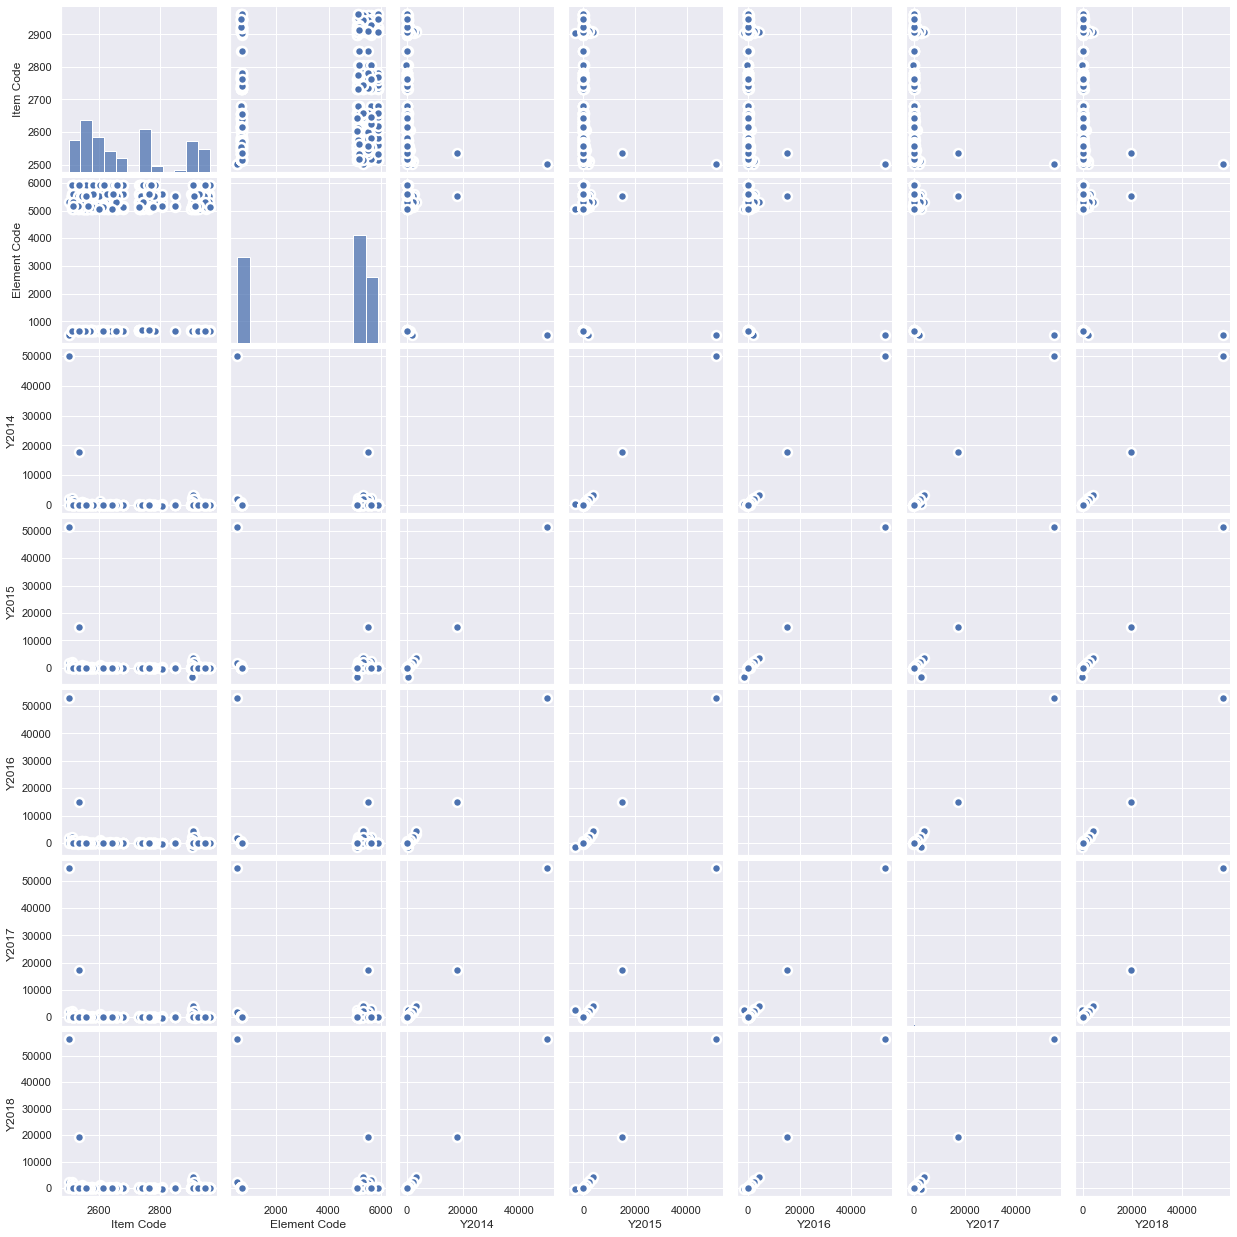

In [11]:
# Type of correlations 
plt.figure(figsize = (20, 12))
num_cols = ["Item Code", "Element Code", "Element", "Unit", "Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]
sns.pairplot(food_df[num_cols].sample(1000), kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<AxesSubplot:xlabel='Y2018', ylabel='Element Code'>

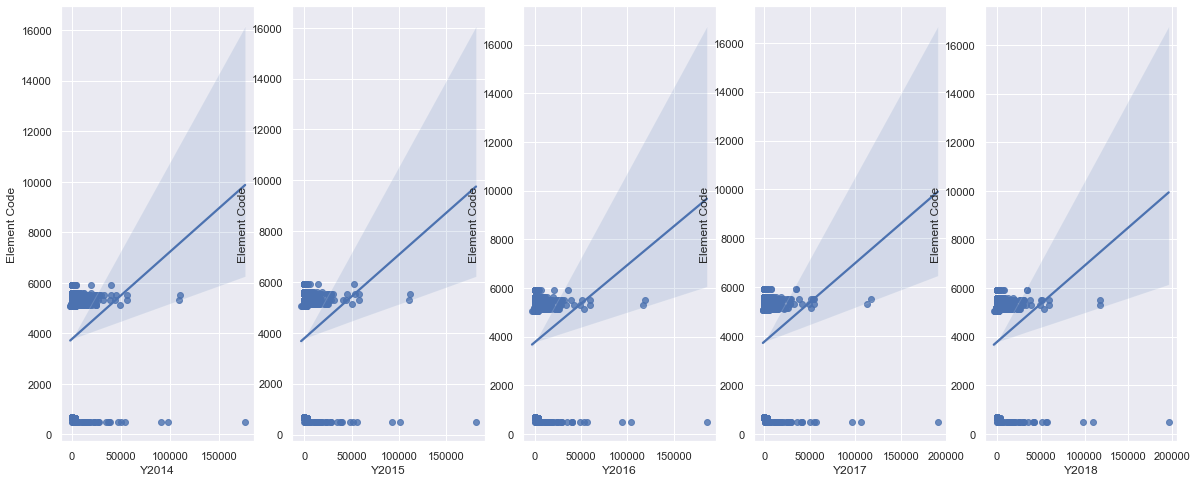

In [12]:
# more Visualize the data
plt.figure(figsize=(20, 8))

plt.subplot(1,5,1)
sns.regplot(x="Y2014", y="Element Code", data=food_df)
#plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,5,2)
sns.regplot(x="Y2015", y="Element Code", data=food_df)
#plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,5,3)
sns.regplot(x="Y2016", y="Element Code", data=food_df)
#plt.title("Label: {}".format(test_labels[12]))

plt.subplot(1,5,4)
sns.regplot(x="Y2017", y="Element Code", data=food_df)
#plt.title("Label: {}".format(test_labels[12]))

plt.subplot(1,5,5)
sns.regplot(x="Y2018", y="Element Code", data=food_df)
#plt.title("Label: {}".format(test_labels[12]))

In [ ]:
# Question 15
food_df.groupby('Element')["Y2014", "Y2015", "Y2016", "Y2017", "Y2018", "Element"].sum()

In [ ]:
# Question 16
food_df.groupby("Element")["Y2014", "Element"].sum()

In [ ]:
# Question 17
food_df.groupby("Element")["Y2018","Element"].sum()

In [ ]:
# Question 18
food_df.groupby("Element")["Y2018","Element"].sum()

In [ ]:
# Qustion 19
food_df.groupby("Area")["Y2018","Element"].sum()

In [31]:
# Question 20
len(food_df["Area"].unique())

49